In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
def rgb2gray(img, method='weighted'):
    assert len(img.shape) == 3
    if method == 'avg':
        return (img[:,:,0] + img[:,:,1] + img[:,:,2])/3.
    else:
        return (0.213*img[:,:,0] + 0.715*img[:,:,1] + 0.072*img[:,:,2])

In [3]:
image_1 = rgb2gray(plt.imread('../data/other-images/image-1.jpg')).astype(np.uint8)
image_2 = rgb2gray(plt.imread('../data/other-images/image-2.jpg')).astype(np.uint8)

[image_1_hist, _] = np.histogram(image_1, bins=np.arange(0,255,1))
[image_2_hist, _] = np.histogram(image_2, bins=np.arange(0,255,1))

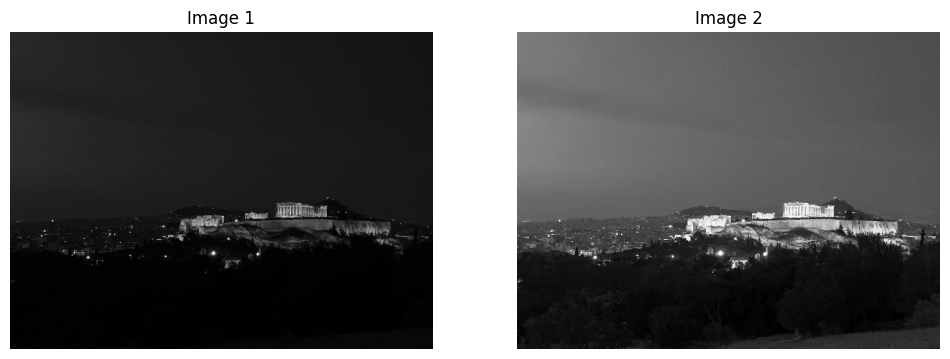

In [4]:
fig, plts = plt.subplots(1,2,figsize=(12,6))
plts[0].imshow(image_1, vmin=0, vmax=255, cmap='gray')
plts[0].set_title(r"Image 1")
plts[0].axis(False)

plts[1].imshow(image_2, vmin=0, vmax=255, cmap='gray')
plts[1].axis(False)
plts[1].set_title(r"Image 2");

**Checkpoint** Which of these images has 'better' contrast?

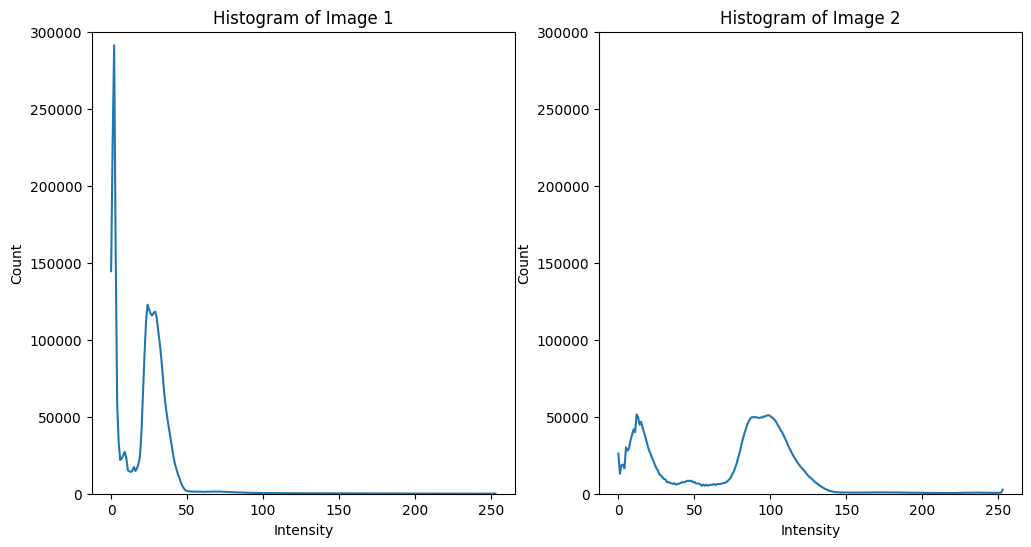

In [7]:
fig, plts = plt.subplots(1,2,figsize=(12,6))
plts[0].plot(np.arange(0,254,1), image_1_hist)
plts[0].set_xlabel(r'Intensity')
plts[0].set_ylabel(r'Count')
plts[0].set_ylim([0,300000])
plts[0].set_title(r'Histogram of Image 1');
plts[1].plot(np.arange(0,254,1), image_2_hist)
plts[1].set_xlabel(r'Intensity')
plts[1].set_ylabel(r'Count')
plts[1].set_ylim([0,300000])
plts[1].set_title(r'Histogram of Image 2');

## Histogram Equalisation

- Given image $I[i,j]$
- Compute the normalized histogram $p[k]$<br>
$p[k]$ is the relative number of pixels with intensity $k$
- Histogram equalisation
$$
    J[i,j] = \displaystyle\sum_{k=0}^{I[i,j]} p[k]
$$

- Not all distribution functions are invertible; discrete implementations introduce errors; output histogram may not be the uniform distribution.

In [5]:
def hist_eq(image):
    [m,n] = image.shape

    [image_hist, _] = np.histogram(image, bins=np.arange(0,255,1))
    image_density = image_hist/(m*n)

    sum_image_density = np.cumsum(image_density)
    sum_image_density = np.append(sum_image_density, [0,0])
    hist_eq_image = (255.0*sum_image_density[image]).astype(np.uint8)

    return hist_eq_image

In [6]:
# image = plt.imread('./data/set5/woman.png')
# image = (rgb2gray(image) * 255).astype(np.uint8)
image = (plt.imread('../data/other-images/LowLight_2.png') * 255).astype(np.uint8)

In [7]:
image_histeq = hist_eq(image);

numbins = 255
[image_hist, _] = np.histogram(image, bins=np.arange(0,numbins,1));
[image_histeq_hist, bins] = np.histogram(image_histeq, bins=np.arange(0,numbins,1));

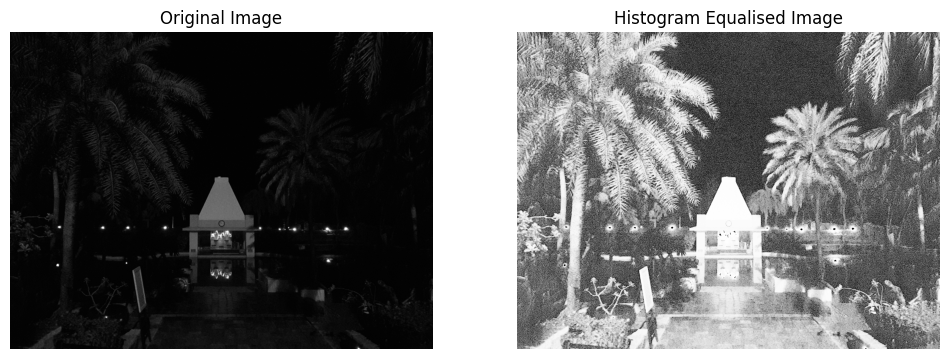

In [8]:
fig, plts = plt.subplots(1,2,figsize=(12,6))
plts[0].imshow(image, vmin=0, vmax=255, cmap='gray')
plts[0].set_title(r"Original Image")
plts[0].axis(False)

plts[1].imshow(image_histeq, vmin=0, vmax=255, cmap='gray')
plts[1].axis(False)
plts[1].set_title(r"Histogram Equalised Image");

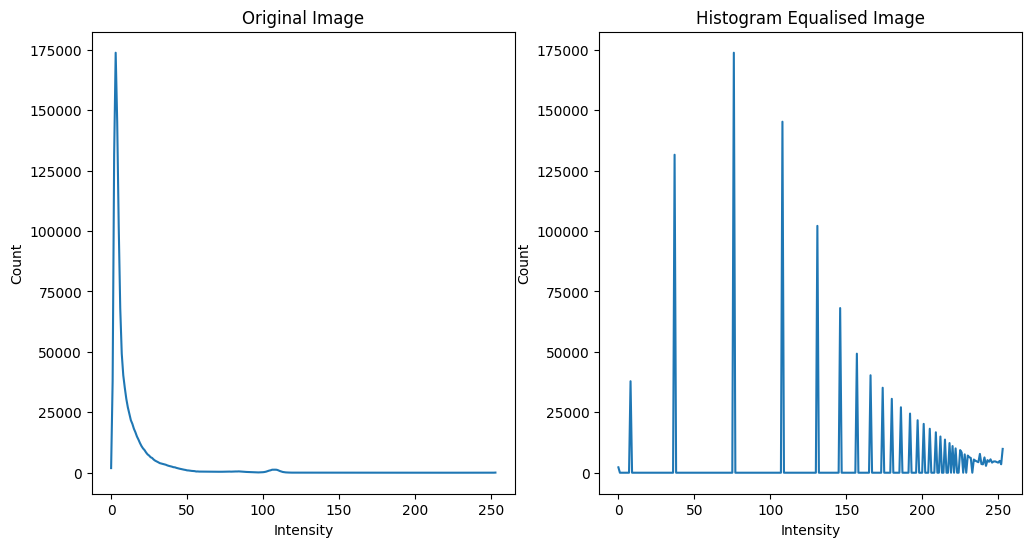

In [9]:
fig, plts = plt.subplots(1,2,figsize=(12,6))
plts[0].plot(np.arange(0,254,1), image_hist)
plts[0].set_xlabel(r'Intensity')
plts[0].set_ylabel(r'Count')
plts[0].set_title(r'Original Image');
plts[1].plot(np.arange(0,254,1), image_histeq_hist)
plts[1].set_xlabel(r'Intensity')
plts[1].set_ylabel(r'Count')
plts[1].set_title(r'Histogram Equalised Image');